Dataset Link: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D

from tqdm import tqdm
import pickle
import os

In [2]:
# Let's create Our Model

resnet_model = ResNet50(include_top=False, # It means I exclude the last all Dense layers
                        weights="imagenet", 
                        input_shape=(224,224,3))

2022-09-25 02:37:40.752228: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


94781440/94765736 [==============================] - 1s 0us/step


In [3]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
# Freeze the trainable weights

resnet_model.trainable = False

In [5]:
# Let's Create our own Model

model = Sequential(layers=[
    resnet_model,
    GlobalMaxPooling2D()
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [41]:
# Let's Create our Function

# load_img(path, grayscale=False, color_mode='rgb', target_size=None, interpolation='nearest') # Default parameters

def extract_important_features(img_path, model):
    img = image.load_img(path=img_path, target_size=(224,224))
    img_array = image.img_to_array(img=img)
    expanded_img_array = np.expand_dims(img, axis=0)
    preprocessed_img = preprocess_input(x=expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / np.linalg.norm(result)
    
    return normalized_result

In [6]:
path = r"../input/fashion-product-images-dataset/fashion-dataset/images"

filenames = []

for file in os.listdir(path=path):
    # "../input/fashion-product-images-dataset/fashion-dataset/images/31973.jpg"
    # It will return like this path
    x = os.path.join(path, file)
    filenames.append(x)

In [7]:
len(filenames)

44441

In [8]:
filenames[:10]

['../input/fashion-product-images-dataset/fashion-dataset/images/31973.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/30778.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/19812.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/22735.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/38246.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/16916.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/52876.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/39500.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/44758.jpg',
 '../input/fashion-product-images-dataset/fashion-dataset/images/59454.jpg']

In [11]:
features_list = []

for file in tqdm(iterable=filenames):
    features_list.append(extract_important_features(img_path=file, model=model))

100%|██████████| 44441/44441 [2:41:16<00:00,  4.59it/s]  


In [23]:
# my_img = r"../input/fashion-product-images-dataset/fashion-dataset/images/31973.jpg"

In [13]:
pickle.dump(obj=features_list, file=open(file="features.pkl", mode="wb"))

pickle.dump(obj=filenames, file=open(file="filenames.pkl", mode="wb"))

In [26]:
my_features = np.array(pickle.load(file=open(file="./features.pkl", mode="rb")))

my_files = np.array(pickle.load(file=open(file="./filenames.pkl", mode="rb")))

In [28]:
my_features2 = my_features.reshape((44441, 2048))

In [29]:
my_features2.shape

(44441, 2048)

In [16]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")

In [30]:
neighbors.fit(X=my_features2)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [42]:
path = "../input/fashion-images/10000.jpg"
result = extract_important_features(img_path=path, model=model)

In [43]:
result

array([0.01886858, 0.01673299, 0.00399703, ..., 0.00810943, 0.01061401,
       0.05708205], dtype=float32)

In [44]:
result.shape

(2048,)

In [45]:
distances, indices = neighbors.kneighbors(X=[result])

In [51]:
distances

array([[5.372690e-08, 5.902196e-01, 7.173783e-01, 7.188198e-01,
        7.410814e-01, 7.483610e-01]], dtype=float32)

In [46]:
indices

array([[33057, 38034,   524,  3170,  3533, 35835]])

In [54]:
indices.flatten()

array([33057, 38034,   524,  3170,  3533, 35835])

In [47]:
import cv2
import matplotlib.image as mpimg

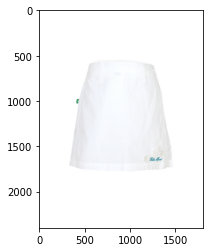

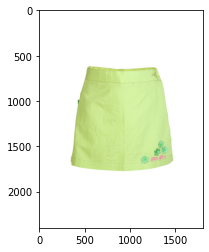

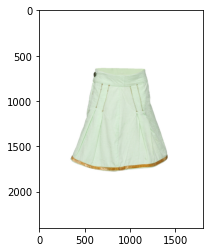

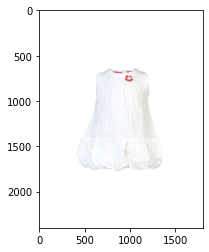

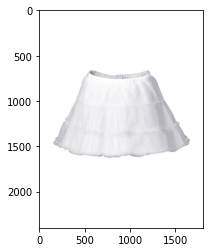

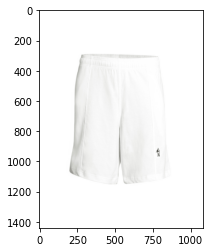

In [49]:
for file in indices[0]:
    img = mpimg.imread(my_files[file])
    imgplot = plt.imshow(img)
    plt.show()

In [52]:
def recommender(path):
    result = extract_important_features(img_path=path, model=model)
    distances, indices = neighbors.kneighbors(X=[result])
    for file in indices[0]:
        img = mpimg.imread(my_files[file])
        imgplot = plt.imshow(img)
        plt.show()

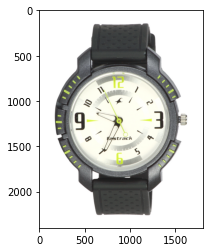

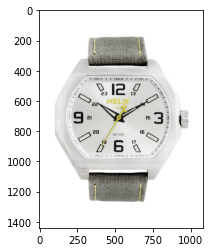

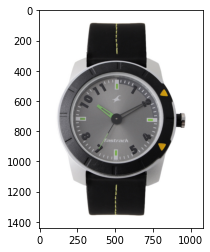

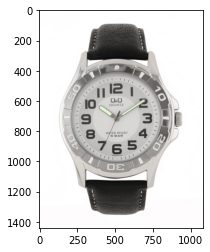

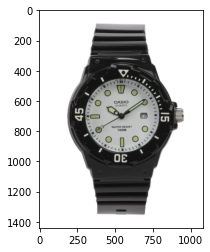

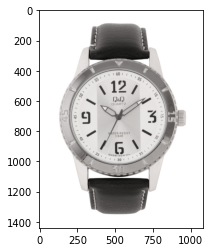

In [55]:
recommender(path="../input/fashion-images/10098.jpg")